## Objetivo

Análise qualitativa e quantitativa dos dados coletados. A partir disso, busca-se entender quais dados se aplicariam mais a _features_ e _targets_ no dataset escolhido. Além disso, entender como os dados se comportam de maneira geral e o comportamento visual.

## Código

Importação das bibliotecas necessárias para a execução do código.

In [10]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.linear_model import LinearRegression
from collections import Counter

Definindo as latitudes máximas e mínimas, das quais serão retirados os dados de temperatura a serem utilizados. Além disso, retira-se os dados nos quais não há valores numéricos.

In [11]:
#Definition of latmax and latmin
latmax = 90.0
latmin = -90.0
lista_lat = np.linspace(latmax, latmin, 250)

Importando os dados de cada arquivo do _.json_ e colocando-os em um dicionário. Posteriormente, esse dicionário será transformado em um dataframe.

In [12]:
#Data reading
important = ['wind_speed', 'wind_degree', 'pressure', 'precip', 'humidity', 'cloudcover', 'uv_index', 'visibility', 'is_day', 'temperature', 'weather_descriptions', 'feelslike']
d = {}

for lat in range(len(lista_lat)):
    dado = pd.read_json(fr'Dados_Real\data-{lat}-({str(lista_lat[lat]).replace(".", "_")}).json')

    if 'error' in dado.columns:
        continue
        
    else:
        dicio = {}
        dicio['latitude'] =  dado['request']['query'][4:9]
        #dicio['longitude'] = 20
        
        for feature in important:
            dicio[feature] = dado['current'][feature]
            

    ID = lat
    df = pd.DataFrame(list(dicio.values()), index=dicio.keys(), columns=[ID])
    
    d[f'df{lat}'] = df
    
primeiro_df = d[list(d.keys())[0]].T

for i in list(d.keys())[1:]:
    primeiro_df = primeiro_df.append(d[i].T)
    
#Saving the dataframes
    
primeiro_df.to_csv('Data csv.csv')
primeiro_df.to_excel('Data excel.xlsx')

final_df = primeiro_df.copy()
final_df

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility,is_day,temperature,weather_descriptions,feelslike
7,84.94,14,163,1022,0,80,5,1,10,no,0,[Clear],-4
8,84.22,14,163,1022,0,80,5,1,10,no,0,[Clear],-4
9,83.49,14,163,1022,0,80,5,1,10,no,0,[Clear],-4
10,82.77,14,163,1022,0,80,5,1,10,no,0,[Clear],-4
11,82.05,28,109,1013,0,80,37,1,10,no,5,[Partly cloudy],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,-71.9,30,121,1002,0,60,46,1,10,no,-23,[Partly cloudy],-36
225,-72.6,30,121,1002,0,60,46,1,10,no,-23,[Partly cloudy],-36
226,-73.3,30,121,1002,0,60,46,1,10,no,-23,[Partly cloudy],-36
227,-74.1,30,121,1002,0,60,46,1,10,no,-23,[Partly cloudy],-36


Conversão dos tipos objeto. Isso foi necessário uma vez que é mais complexo trabalhar com os dados antes da conversão.

In [13]:
#Converting the datatypes
df_convertido = final_df.convert_dtypes()
df_convertido["latitude"] = df_convertido["latitude"].astype(np.float64)
df_convertido["is_day"] = df_convertido["is_day"] == "yes"
df_convertido["weather_descriptions"] = df_convertido["weather_descriptions"].astype("string")

Salvando o dataframe com os valores convertidos.

In [14]:
#Saving the converted dataframes
df_convertido.to_csv('Final Data.csv')
df_convertido.to_excel('Final Data.xlsx')

Agora, serão plotados os dados de temperatura e sensação térmica em função da latitude.

<Figure size 1800x1200 with 0 Axes>

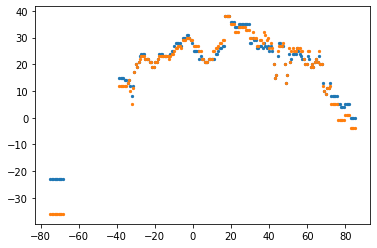

<Figure size 1800x1200 with 0 Axes>

In [15]:
#Plotting temperature/feelslike x latitude
plt.scatter(list(df_convertido["latitude"]), list(df_convertido["temperature"]), s=5)
plt.scatter(list(df_convertido["latitude"]), list(df_convertido["feelslike"]), s=5)
plt.figure(dpi=300)

Com isso, percebe-se que os dados analisados foram condizentes com o que se esperava. É possível notar isso uma vez que a temperatura nos polos está muito abaixo daquelas no equador, assim como a temperatura nos mares e oceanos. Além disso, percebe-se que dados de temperatura e sensação térmica estão conectados, havendo a variação já esperada.

Removendo os dados referentes a Antártida, uma vez que as temperaturas eram muito baixas, causando problemas ao modelo.

In [16]:
#Removing Antarctica datas (Can be considered as outliers)
df_outlierdrop = df_convertido.iloc[0:172].copy()

Dataframe sem os dados da Antártida.

In [17]:
df_outlierdrop.describe()

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility,is_day,temperature,feelslike
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172,172.000000,172.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156,NaN,NaN
mean,23.143198,13.360465,174.476744,1011.145349,0.314535,55.610465,29.500000,3.534884,9.500000,NaN,21.930233,21.633721
std,35.983004,8.669922,104.879739,3.054444,1.527437,31.438132,34.441832,2.841619,1.634783,NaN,8.531731,9.648175
min,-38.600000,4.000000,1.000000,1005.000000,0.000000,8.000000,0.000000,1.000000,2.000000,NaN,0.000000,-4.000000
25%,-7.770000,7.000000,99.250000,1009.000000,0.000000,18.000000,0.000000,1.000000,10.000000,NaN,19.000000,19.000000
50%,23.130000,12.000000,167.500000,1011.000000,0.000000,68.000000,10.000000,2.000000,10.000000,NaN,23.000000,23.000000
75%,54.040000,17.000000,265.000000,1013.000000,0.000000,82.000000,57.500000,6.000000,10.000000,NaN,27.000000,28.000000


Agora, será plotado o mesmo gráfico que o anterior, porém sem os valores referentes a Antártida.

<AxesSubplot:xlabel='latitude'>

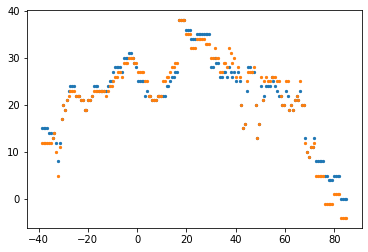

<Figure size 4320x2880 with 0 Axes>

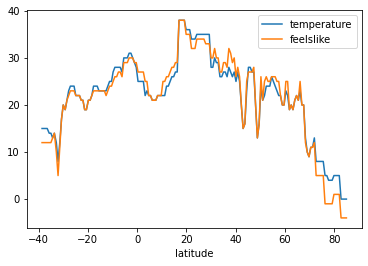

In [21]:
#Plotting temperature/feelslike x latitude
plt.scatter(list(df_outlierdrop["latitude"]), list(df_outlierdrop["temperature"]), s=5)
plt.scatter(list(df_outlierdrop["latitude"]), list(df_outlierdrop["feelslike"]), s=5)
plt.figure(dpi=720)

df_outlierdrop.plot("latitude", y=["temperature", "feelslike"])

Nesse momento, plota-se um grafico de setores, que possibilita analisar quantitativamente os dados categóricos.

<AxesSubplot:ylabel='0'>

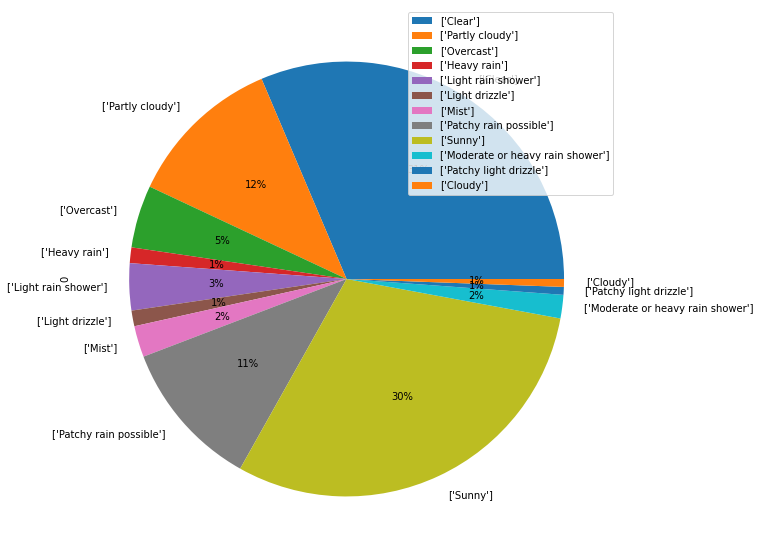

In [22]:
#Plotting weather descriptions in a pie chart
w_desc = pd.DataFrame.from_dict(Counter(list(df_outlierdrop["weather_descriptions"])), orient="index")
w_desc.plot.pie(y=0, figsize=(10,10), autopct='%1.0f%%')

Percebe-se aqui que a maior parte dos dados é dado por _clear_ e _sunny_. Ou seja, têm-se uma melhor coleta de dados em um clima aberto.

Definindo a função que irá fazer a normalização.

In [23]:
#Normilize function
def normalize(df):
    df_c = df.copy()
    for index in df_c.columns:
        i = index
        if is_numeric_dtype(df_c[i]) == False or str(df_c[i].dtype) == 'boolean':
            df_c[index] = df_c[index]
        else:
            df_c[i] = df_c[i] / df_c[i].max()
    return df_c

Faz-se a normalização do datframe de modo a não haver grandes discrepâncias, sendo essencial para o treinamento e visualização do modelo.

In [24]:
df_norm = normalize(df_outlierdrop)
df_norm #Normalized dataframe

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility,is_day,temperature,weather_descriptions,feelslike
7,1.000000,0.27451,0.455307,1.0,0.0,0.8,0.05,0.111111,1.0,False,0.0,['Clear'],-0.105263
8,0.991523,0.27451,0.455307,1.0,0.0,0.8,0.05,0.111111,1.0,False,0.0,['Clear'],-0.105263
9,0.982929,0.27451,0.455307,1.0,0.0,0.8,0.05,0.111111,1.0,False,0.0,['Clear'],-0.105263
10,0.974453,0.27451,0.455307,1.0,0.0,0.8,0.05,0.111111,1.0,False,0.0,['Clear'],-0.105263
11,0.965976,0.54902,0.304469,0.991194,0.0,0.8,0.37,0.111111,1.0,False,0.131579,['Partly cloudy'],0.026316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,-0.420297,0.686275,0.756983,0.990215,0.0,0.75,0.1,0.111111,1.0,False,0.368421,['Clear'],0.315789
175,-0.429715,0.686275,0.740223,0.989237,0.0,0.75,0.08,0.444444,1.0,False,0.394737,['Sunny'],0.315789
176,-0.437956,0.686275,0.740223,0.989237,0.0,0.75,0.08,0.444444,1.0,False,0.394737,['Sunny'],0.315789
177,-0.446197,0.686275,0.740223,0.989237,0.0,0.75,0.08,0.444444,1.0,False,0.394737,['Sunny'],0.315789


Definindo uma função para eliminação dos valores que são booleanos. A remoção dos valores booleanos facilita o trabalho com os dados.

In [25]:
def vars_nobool(df):
    lista = []
    for i in df.columns:
        if str(df[i].dtype) == 'boolean':
            continue
        else:
            lista.append(i)
    return lista
def vars_num(df):
    lista = []
    for i in df.columns:
        if is_numeric_dtype(df[i]) == False or str(df[i].dtype) == 'boolean':
            continue
        else:
            lista.append(i)
    return lista

A seguir, é feito um plot de pares, relacionando todos os pares, de modo a ver a relação entre um dado e outro.

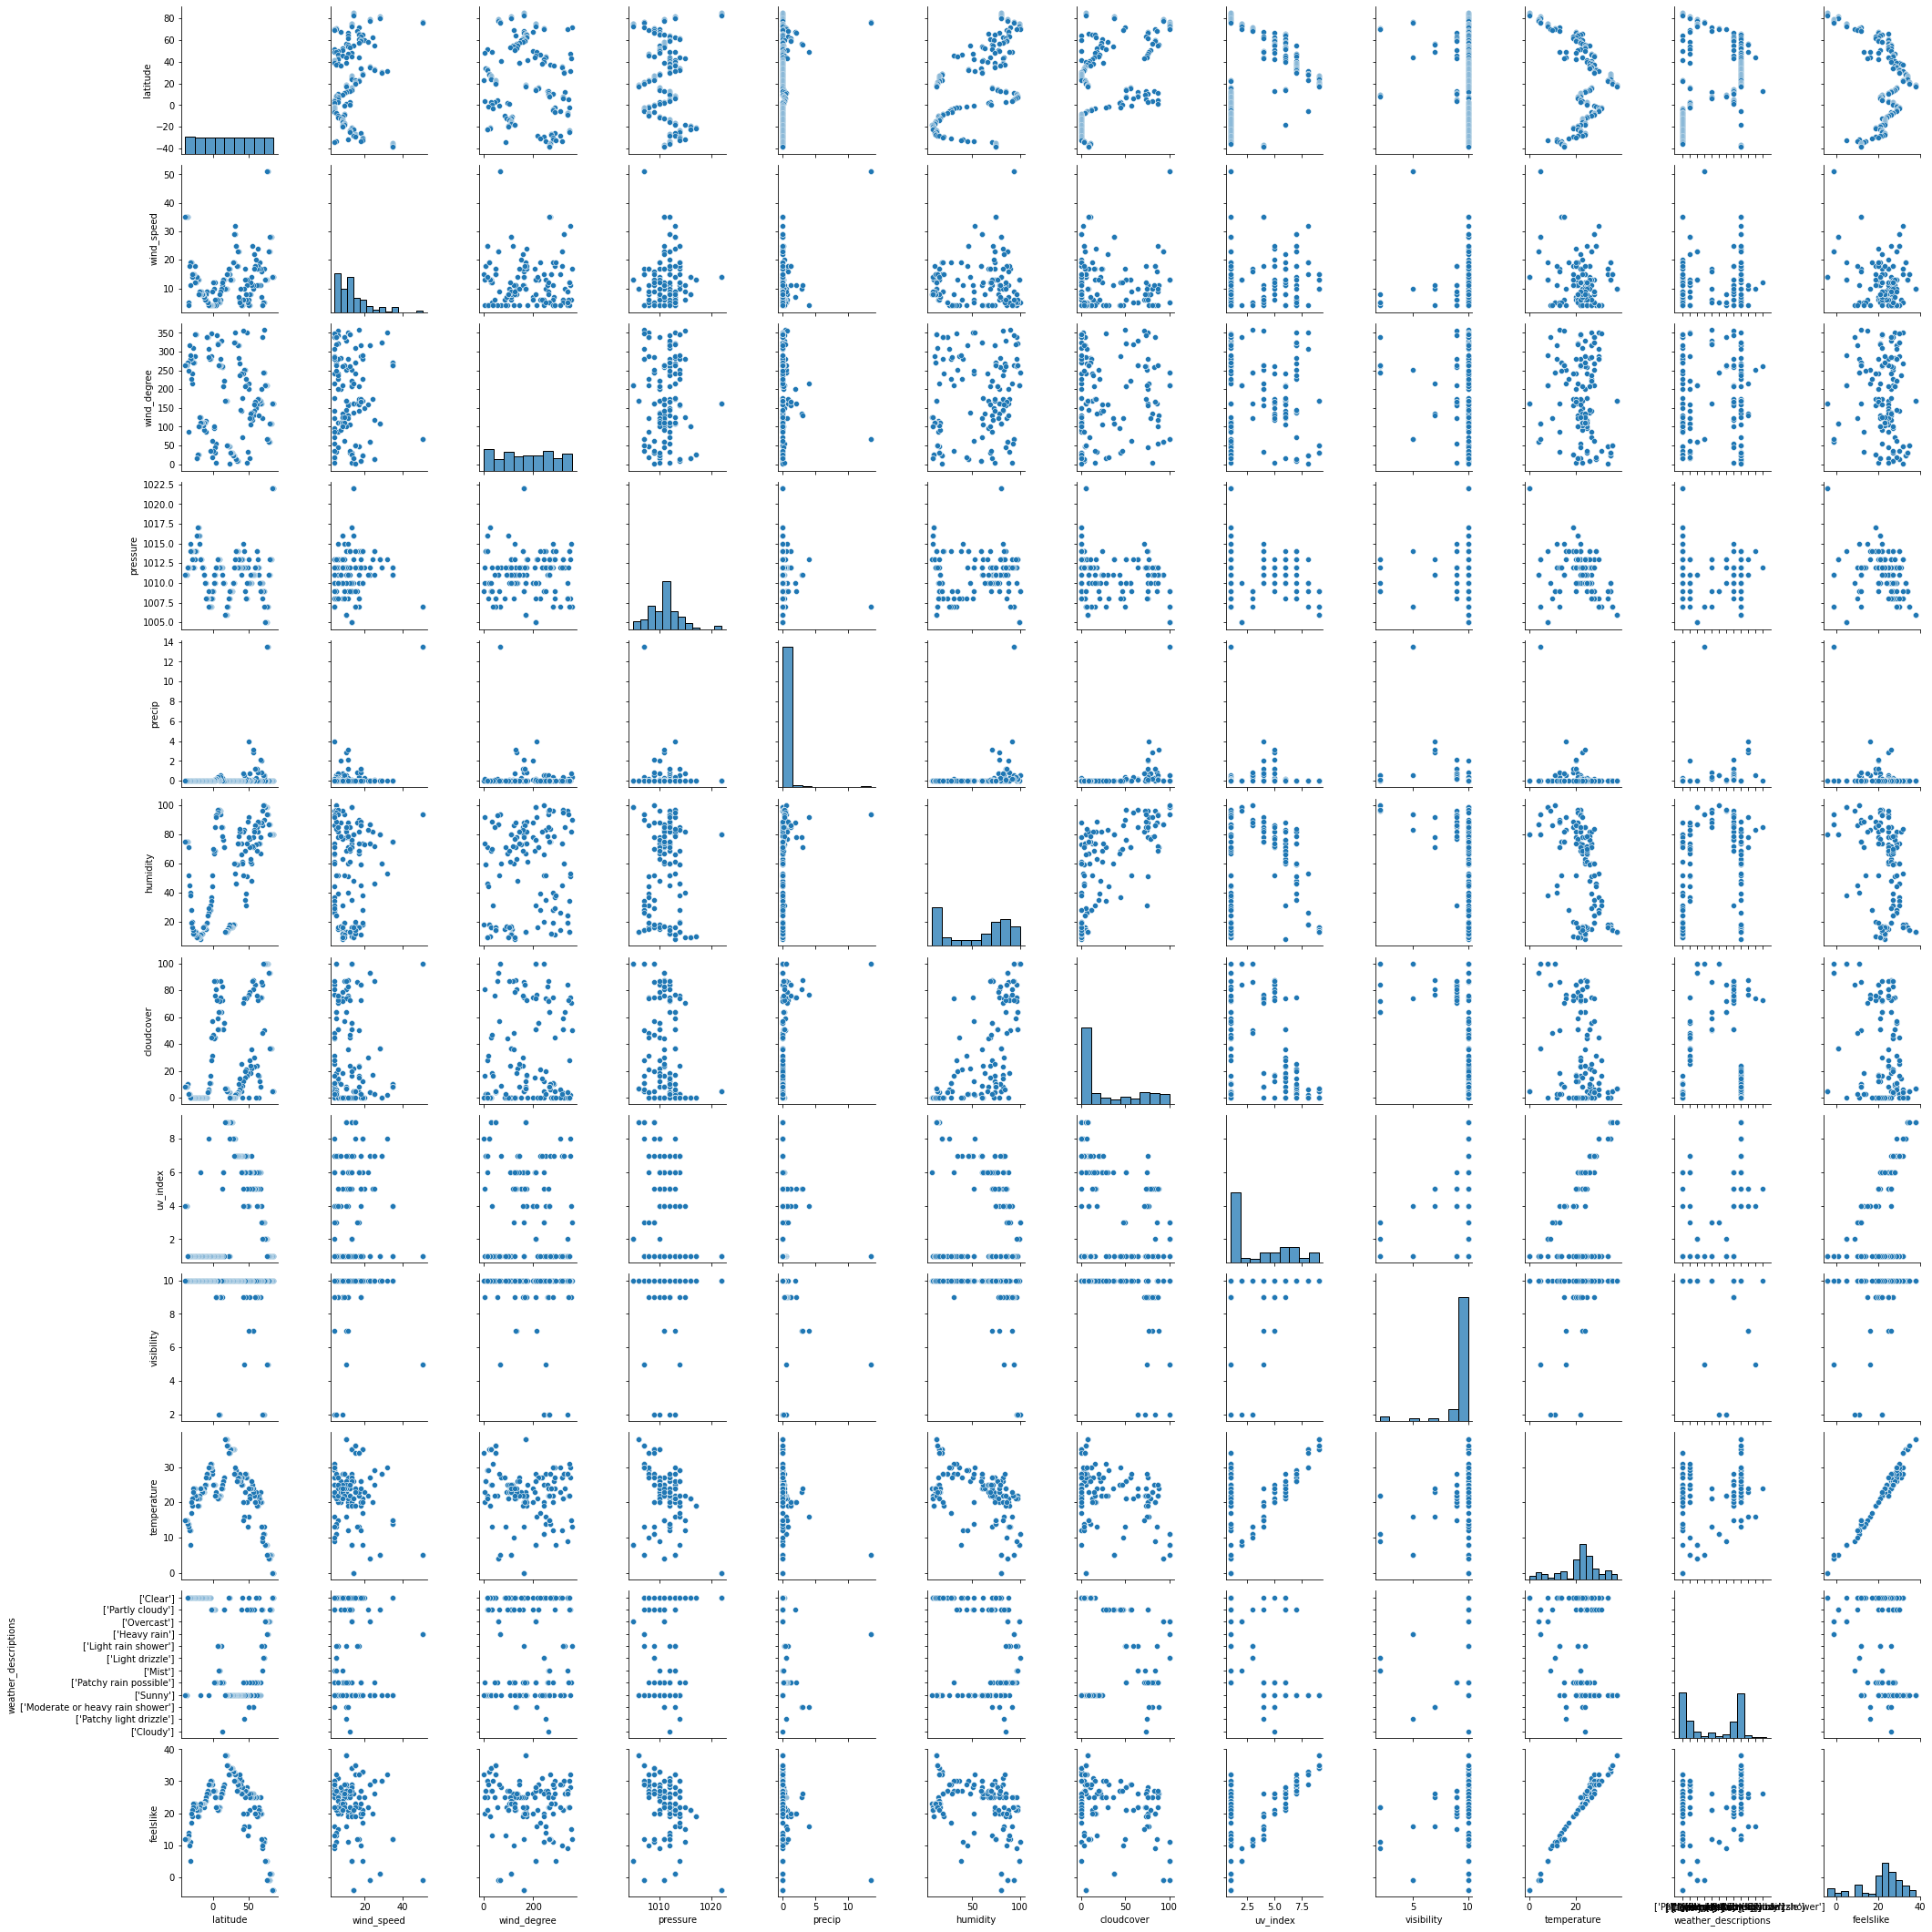

In [26]:
#Pair plotting (covariance)
nobool = vars_nobool(df_outlierdrop)
sns.pairplot(df_outlierdrop, vars=nobool)
plt.show()

Feito isso, encontramos alguns comportamentos que parecem interessantes, que serão confirmados na matriz de covariância. Um comportamento interessante foi observado, por exemplo, no gráfico do índice UV pela temperatura.

Removendo os dados não numéricos, com o objetivo de fazer operações numéricas no dataframe inteiro.

In [27]:
def remove_not_numbers(df):
    df_c = df.copy()
    for i in df_c.columns:
        if is_numeric_dtype(df_c[i]) == False or str(df_c[i].dtype) == 'boolean':
            #print(i, "removido")
            df_c = df_c.drop([i], axis=1)
        else:
            continue
    return df_c

Dataframe sem os dados não numéricos.

In [31]:
df_norm_num = remove_not_numbers(df_norm)
for i in df_norm_num.columns:
    df_norm_num[i] = df_norm_num[i].astype(float)
df_norm_num

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility,temperature,feelslike
7,1.000000,0.274510,0.455307,1.000000,0.0,0.80,0.05,0.111111,1.0,0.000000,-0.105263
8,0.991523,0.274510,0.455307,1.000000,0.0,0.80,0.05,0.111111,1.0,0.000000,-0.105263
9,0.982929,0.274510,0.455307,1.000000,0.0,0.80,0.05,0.111111,1.0,0.000000,-0.105263
10,0.974453,0.274510,0.455307,1.000000,0.0,0.80,0.05,0.111111,1.0,0.000000,-0.105263
11,0.965976,0.549020,0.304469,0.991194,0.0,0.80,0.37,0.111111,1.0,0.131579,0.026316
...,...,...,...,...,...,...,...,...,...,...,...
174,-0.420297,0.686275,0.756983,0.990215,0.0,0.75,0.10,0.111111,1.0,0.368421,0.315789
175,-0.429715,0.686275,0.740223,0.989237,0.0,0.75,0.08,0.444444,1.0,0.394737,0.315789
176,-0.437956,0.686275,0.740223,0.989237,0.0,0.75,0.08,0.444444,1.0,0.394737,0.315789
177,-0.446197,0.686275,0.740223,0.989237,0.0,0.75,0.08,0.444444,1.0,0.394737,0.315789


Agora, será feita a matriz de covariância. Essa, sendo quadrática, provém a covariância entre as coluna do dataframe, ajudando na análise entre dados em pares.

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility,temperature,feelslike
latitude,0.179461,0.009947,-0.022264,-0.000110,0.011346,0.078842,0.070205,0.043927,-0.013008,-0.032129,-0.034550
wind_speed,0.009947,0.028899,-0.002997,0.000032,0.007804,0.007529,-0.000938,0.004444,0.001376,-0.011191,-0.014916
wind_degree,-0.022264,-0.002997,0.085826,0.000002,-0.002998,0.016446,0.007247,-0.016874,-0.006598,-0.007420,-0.006014
pressure,-0.000110,0.000032,0.000002,0.000009,-0.000045,0.000048,-0.000268,-0.000231,0.000013,-0.000255,-0.000247
precip,0.011346,0.007804,-0.002998,-0.000045,0.012801,0.007849,0.013912,-0.002683,-0.007024,-0.005911,-0.007383
humidity,0.078842,0.007529,0.016446,0.000048,0.007849,0.098836,0.076587,-0.007129,-0.018395,-0.039621,-0.038390
cloudcover,0.070205,-0.000938,0.007247,-0.000268,0.013912,0.076587,0.118624,-0.021982,-0.026579,-0.030240,-0.030843
uv_index,0.043927,0.004444,-0.016874,-0.000231,-0.002683,-0.007129,-0.021982,0.099689,0.006498,0.037215,0.042042
visibility,-0.013008,0.001376,-0.006598,0.000013,-0.007024,-0.018395,-0.026579,0.006498,0.026725,0.007587,0.007795
temperature,-0.032129,-0.011191,-0.007420,-0.000255,-0.005911,-0.039621,-0.030240,0.037215,0.007587,0.050409,0.056129


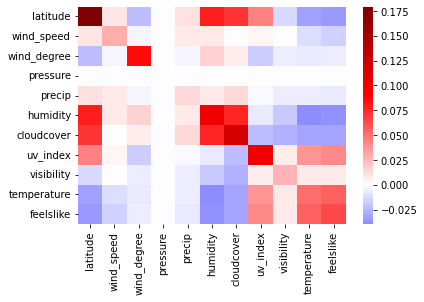

<Figure size 7200x7200 with 0 Axes>

In [30]:
#Calculating and plotting the covariance matrix
df_num = remove_not_numbers(df_outlierdrop)
for i in df_num.columns:
    df_num[i] = df_num[i].astype(float)
labels = list(df_num.columns)
sns.heatmap(np.cov(np.array(df_norm_num).T), xticklabels=labels, yticklabels=labels, cmap='seismic', center=0)
plt.figure(figsize=(100,100))
pd.DataFrame(np.cov(np.array(df_norm_num).T), index=labels, columns=labels)

A partir da matriz de covariância e seus heatmap é que os dados em pares mais escuros (vermelhos) são mais fortemente relacionados em uma escala diretamente proporcional. Concomitante à isso, os pares de dado em azul serão mais fortemente relacionados em uma proporção inversa. Os valores próximos ao branco terão pouca relação dentre si.

<AxesSubplot:>

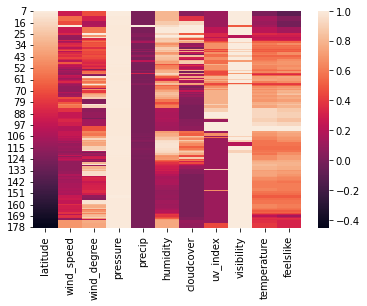

In [32]:
#Plotting a heatmap of the dataframe
sns.heatmap(df_norm_num)

Heatmap feito a partir dos dados normalizados. A prtir disso, pode-se perceber uma grande variação entre dados como temperatura e sensação térmica. Enquanto há uma maior estabilidade entre os valores para dados como precipitação e visibilidade. Há o detalhe da latitude fazendo um gradiente por se tratar de um dado que varia linearmente em todo o trajeto.

Agora, faz-se uma regressão polinomial, tentando aproximar os dados. Foi escolhida a polinomial devido a necessidade de teste, além de parecer o modelo que mais se adequava ao gráfico obtido.

In [ ]:
#Calculating and plotting a polynomial regression
X = np.array(df_outlierdrop.iloc[:, 0].values, dtype=np.float).reshape(-1)
Y = np.array(df_outlierdrop.iloc[:, -3].values, dtype=np.float).reshape(-1)

model_temperature = np.poly1d(np.polyfit(X, Y, 10))
line_temperature = X
#print('Temperatura: ', np.poly1d(np.polyfit(X, Y, 10)))

plt.scatter(X,Y, s=5)
plt.plot(line_temperature, model_temperature(line_temperature), color='red')
plt.figure()

X = np.array(df_outlierdrop.iloc[:, 0].values, dtype=np.float).reshape(-1)
Y = np.array(df_outlierdrop.iloc[:, -1].values, dtype=np.float).reshape(-1)

model_feelslike = np.poly1d(np.polyfit(X, Y, 10))
line_feelslike = X


plt.scatter(X,Y, s=5, color='orange')
plt.plot(line_feelslike, model_feelslike(line_feelslike), color='red')
plt.figure()

Aqui, os dados relativos a Antártida são colocados de volta e é refeita a regressão polinomial com esses dados.

C:\Users\PEDRO2~1\AppData\Local\Temp/ipykernel_24600/4085539984.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.array(final_df.iloc[:, 0].values, dtype=np.float).reshape(-1)
C:\Users\PEDRO2~1\AppData\Local\Temp/ipykernel_24600/4085539984.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y = np.array(final_df.iloc[:, -3].value

<Figure size 432x288 with 0 Axes>

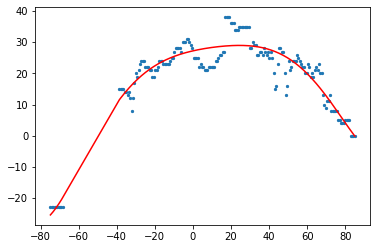

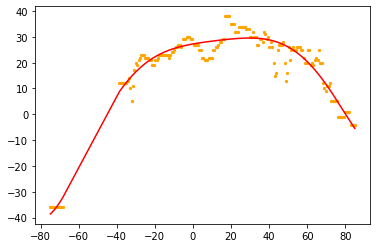

<Figure size 432x288 with 0 Axes>

In [33]:
#Calculating and plotting a polynomial regression with Antarctica datas
X = np.array(final_df.iloc[:, 0].values, dtype=np.float).reshape(-1)
Y = np.array(final_df.iloc[:, -3].values, dtype=np.float).reshape(-1)

model_temperature = np.poly1d(np.polyfit(X, Y, 6))
line_temperature = X
#print('Temperatura: ', np.poly1d(np.polyfit(X, Y, 10)))

plt.scatter(X,Y, s=5)
plt.plot(line_temperature, model_temperature(line_temperature), color='red')
plt.figure()

X = np.array(final_df.iloc[:, 0].values, dtype=np.float).reshape(-1)
Y = np.array(final_df.iloc[:, -1].values, dtype=np.float).reshape(-1)

model_feelslike = np.poly1d(np.polyfit(X, Y, 6))
line_feelslike = X


plt.scatter(X,Y, s=5, color='orange')
plt.plot(line_feelslike, model_feelslike(line_feelslike), color='red')
plt.figure()

Assim, é obtido um resultado, mas não com a precisão necessária para previsões futuras. Isso ocorre pelo fato de dados de temperatura e sensação térmica apresentarem grande variação.